# Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline
from scipy import stats
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%y').date()

# Load Dataset 

In [62]:
data=pd.read_excel("service-data.xlsx",header=0,date_parser='Job_Card_Date')
data.index.freq = 'D'
data.head()

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [4]:
data.describe() 

,Current_KM_Reading
count,28482.000000
mean,19348.003827
std,25246.722306
min,0.000000
25%,3988.000000
50%,12420.500000
75%,27905.000000
max,610112.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28484 entries, 0 to 28483
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Invoice_Date           28482 non-null  datetime64[ns]
 1   Job_Card_Date          28482 non-null  datetime64[ns]
 2   Business_Partner_Name  28484 non-null  object        
 3   Vehicle_No             28484 non-null  object        
 4   Vehicle_Model          28482 non-null  object        
 5   Current_KM_Reading     28482 non-null  float64       
 6   INVOICE_LINE_TEXT      28449 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 1.5+ MB


In [6]:
data_filter= data[(data['INVOICE_LINE_TEXT']=='SWITCH')]
data_filter

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT
311,2017-06-07,2017-06-07,santXXXXXXXXXX,KA27V8XXXX,BAJAJ PULSAR 150,56230.0,SWITCH
2416,2017-07-28,2017-07-28,pravXXXXXXXXXX,KA03EPXXXX,BAJAJ PULSAR 150,31618.0,SWITCH
2419,2017-07-28,2017-07-28,pravXXXXXXXXXX,KA03EPXXXX,BAJAJ PULSAR 150,31618.0,SWITCH
2561,2017-08-01,2017-08-01,ANOOXXXXXXXXXX,KA19EHXXXX,BAJAJ AVENGER STREET 220,9514.0,SWITCH
3702,2017-09-04,2017-09-04,rambXXXXXXXXXX,KA03EZXXXX,BAJAJ PULSAR 150,55172.0,SWITCH
3704,2017-09-04,2017-09-04,rambXXXXXXXXXX,KA03EZXXXX,BAJAJ PULSAR 150,55172.0,SWITCH
3920,2017-09-08,2017-09-08,santXXXXXXXXXX,KA53EPXXXX,BAJAJ V,24906.0,SWITCH
4087,2017-09-14,2017-09-14,satiXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 220,11164.0,SWITCH
4567,2017-09-25,2017-09-25,RAJUXXXXXXXXXX,KA53EMXXXX,BAJAJ PULSAR 220,9902.0,SWITCH
4655,2017-09-26,2017-09-26,jai XXXXXXXXXX,KA05HEXXXX,BAJAJ PULSAR 150,41671.0,SWITCH


# Checking for the outliers

<AxesSubplot:>

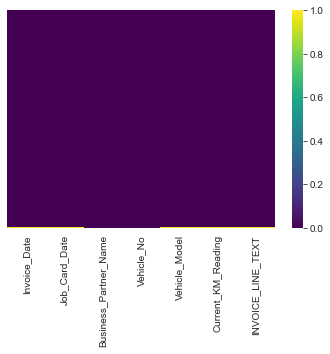

In [7]:
import seaborn as sns
sns.set_style('whitegrid')
sns.heatmap(data.isnull(),cbar=True,yticklabels=False,cmap='viridis')

# Create Orders on demand column in the DataFrame

In [8]:
data.loc[data.INVOICE_LINE_TEXT!=0,'Orders_on_Demand']=1
data.head(4)

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,1.0
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,1.0
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,1.0
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,1.0


# Find difference of days between job card date and invoice date

In [9]:
data['date_difference']=data['Invoice_Date']-data['Job_Card_Date']

In [10]:
data.head()

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand,date_difference
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,1.0,0 days
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,1.0,2 days
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,1.0,2 days
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,1.0,2 days
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,1.0,2 days


In [11]:
Counter(data.date_difference)

Counter({Timedelta('0 days 00:00:00'): 28066,
         Timedelta('2 days 00:00:00'): 23,
         Timedelta('3 days 00:00:00'): 83,
         Timedelta('4 days 00:00:00'): 16,
         Timedelta('1 days 00:00:00'): 233,
         Timedelta('5 days 00:00:00'): 47,
         Timedelta('19 days 00:00:00'): 7,
         Timedelta('16 days 00:00:00'): 2,
         Timedelta('-1 days +00:00:00'): 5,
         NaT: 2})

In [12]:
data[data.date_difference =='19 days']

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand,date_difference
8435,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,CHAIN LUBRICATION,1.0,19 days
8436,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,SEAT COVER,1.0,19 days
8437,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,TANK COVER,1.0,19 days
8438,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,ENGINE OIL,1.0,19 days
8439,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,AIR FILTER,1.0,19 days
8440,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,BRAKE SHOE,1.0,19 days
8441,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,WHEEL RUBBER,1.0,19 days


# Check for EDA steps

In [13]:
data.shape #For checking the shape of the data

(28484, 9)

In [14]:
Counter(data.INVOICE_LINE_TEXT) #To count the number of each spare part

Counter({'ENGINE OIL': 3802,
         'POLISH': 1245,
         'CONSUMABLES': 1595,
         'COOLANT OIL': 70,
         'CHAIN LUBRICATION': 3441,
         '4 WAY SWITCH': 2,
         '3M OIL': 1628,
         'GENERAL SERVICE': 2142,
         'OIL FILTER': 821,
         'INDICATOR': 110,
         'HEAD REST': 56,
         'VALVE GUIDE': 63,
         'TIMMING CHAIN': 78,
         'FOOT REST': 99,
         'LOW BEAM BULB': 12,
         'VALVE GRAINDING': 63,
         'DISC PAD': 575,
         'LOADING GEAR': 53,
         'PACKING KIT': 56,
         'TIMMING CHAIN PAD': 73,
         'TENSIONER': 79,
         'CLUTCH BELL REST': 21,
         'CLUTCH ASSEMBLY': 212,
         'VALVE KIT': 66,
         'SPARK PLUG': 421,
         'ONE WAY CLUTCH': 5,
         'BORE KIT': 53,
         'AIR FILTER': 1715,
         'HEAD RUBBER': 18,
         'CLUTCH CABLE': 263,
         'CRANK SHAFT': 50,
         'BRAKE ADJUSTMENT': 7,
         'BRAKE SHOE': 965,
         'AIR FILTER CHECKUP': 467,
         

In [15]:
data.head() 

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand,date_difference
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,1.0,0 days
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,1.0,2 days
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,1.0,2 days
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,1.0,2 days
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,1.0,2 days


In [16]:
data.isnull().sum().to_frame() # To check for the null values in the data

,0
Invoice_Date,2
Job_Card_Date,2
Business_Partner_Name,0
Vehicle_No,0
Vehicle_Model,2
Current_KM_Reading,2
INVOICE_LINE_TEXT,35
Orders_on_Demand,0
date_difference,2


In [17]:
data.dropna(axis=0,inplace=True) # To drop all the null values present in the data

In [18]:
data.isnull().sum().to_frame()

,0
Invoice_Date,0
Job_Card_Date,0
Business_Partner_Name,0
Vehicle_No,0
Vehicle_Model,0
Current_KM_Reading,0
INVOICE_LINE_TEXT,0
Orders_on_Demand,0
date_difference,0


# Convert argument to datetime

In [19]:
data['Job_Card_Date']=pd.to_datetime(data['Job_Card_Date'])

In [20]:
type(data['Job_Card_Date'].iloc[0]) # Check the type 

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
data['Job_Card_Date'] # Display the details of Job Card Date

0       2017-05-30
1       2017-05-31
2       2017-05-31
3       2017-05-31
4       2017-05-31
           ...    
28477   2019-01-06
28478   2019-01-06
28479   2019-01-06
28480   2019-01-06
28481   2019-01-06
Name: Job_Card_Date, Length: 28448, dtype: datetime64[ns]

# Split the data using DatetimeIndex function

In [22]:
data['Year'] = pd.DatetimeIndex(data['Job_Card_Date']).year # To separate year from the job card date
data['Month'] = pd.DatetimeIndex(data['Job_Card_Date']).month # To separate month from the job card dates

In [23]:
data.groupby('INVOICE_LINE_TEXT').count() # Count the value of each spare part and group them

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,Orders_on_Demand,date_difference,Year,Month
INVOICE_LINE_TEXT,,,,,,,,,,
10 SIZE NUT,2,2,2,2,2,2,2,2,2,2
12 SIZE BOLT,2,2,2,2,2,2,2,2,2,2
3M OIL,1628,1628,1628,1628,1628,1628,1628,1628,1628,1628
4 WAY SWITCH,2,2,2,2,2,2,2,2,2,2
6004 BEARING,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
YOKE SET,1,1,1,1,1,1,1,1,1,1
bore kit,3,3,3,3,3,3,3,3,3,3
clutch cable,72,72,72,72,72,72,72,72,72,72


In [24]:
data

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand,date_difference,Year,Month
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,1.0,0 days,2017,5
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,1.0,2 days,2017,5
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,1.0,2 days,2017,5
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,1.0,2 days,2017,5
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,1.0,2 days,2017,5
...,...,...,...,...,...,...,...,...,...,...,...
28477,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,SPROCKET RUBBER,1.0,0 days,2019,1
28478,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,CLUTCH CABLE,1.0,0 days,2019,1
28479,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,OIL FILTER,1.0,0 days,2019,1
28480,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,DISC OIL,1.0,0 days,2019,1


In [25]:
x=data.date_difference.astype(str)
print(x[:2])
data['date_difference']=[int(x[:2])\
                   for x in data.date_difference.astype(str)]
data

0    0 days
1    2 days
Name: date_difference, dtype: object


,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand,date_difference,Year,Month
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,1.0,0,2017,5
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,1.0,2,2017,5
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,1.0,2,2017,5
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,1.0,2,2017,5
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,1.0,2,2017,5
...,...,...,...,...,...,...,...,...,...,...,...
28477,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,SPROCKET RUBBER,1.0,0,2019,1
28478,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,CLUTCH CABLE,1.0,0,2019,1
28479,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,OIL FILTER,1.0,0,2019,1
28480,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,DISC OIL,1.0,0,2019,1


In [26]:
data[data.date_difference==16]

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand,date_difference,Year,Month
9754,2018-02-21,2018-02-05,jagaXXXXXXXXXX,AP27ARXXXX,BAJAJ PULSAR 220,0.0,HEAD LIGHT DOOM,1.0,16,2018,2
9755,2018-02-21,2018-02-05,jagaXXXXXXXXXX,AP27ARXXXX,BAJAJ PULSAR 220,0.0,LABOUR,1.0,16,2018,2


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28448 entries, 0 to 28481
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Invoice_Date           28448 non-null  datetime64[ns]
 1   Job_Card_Date          28448 non-null  datetime64[ns]
 2   Business_Partner_Name  28448 non-null  object        
 3   Vehicle_No             28448 non-null  object        
 4   Vehicle_Model          28448 non-null  object        
 5   Current_KM_Reading     28448 non-null  float64       
 6   INVOICE_LINE_TEXT      28448 non-null  object        
 7   Orders_on_Demand       28448 non-null  float64       
 8   date_difference        28448 non-null  int64         
 9   Year                   28448 non-null  int64         
 10  Month                  28448 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 2.6+ MB


In [28]:
data_vehicle_model=data.groupby('Vehicle_Model').sum()

In [29]:
data_vehicle_model.head()

,Current_KM_Reading,Orders_on_Demand,date_difference,Year,Month
Vehicle_Model,,,,,
BAJAJ AVENGER STREET,15193415.0,1111.0,0,2241666,8214
BAJAJ AVENGER STREET 180,205442.0,122.0,0,246196,1133
BAJAJ AVENGER STREET 220,63521043.0,4212.0,145,8498488,32034
BAJAJ BOXER CT,14620.0,4.0,0,8068,24
BAJAJ CALIBER,1495382.0,40.0,0,80694,326


# Finding the Trends

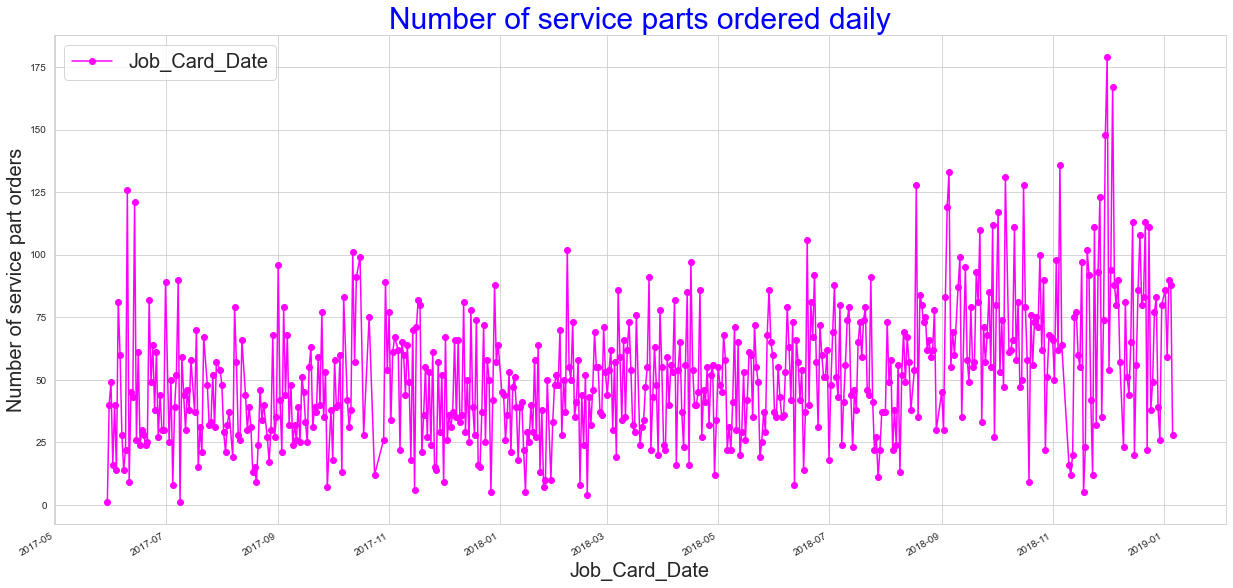

In [30]:
d1=data.groupby(['Job_Card_Date'])['Job_Card_Date'].count().to_frame()
d1.plot(kind='line',figsize=[21,10],color='magenta',marker='o')
plt.title("Number of service parts ordered daily",fontdict={'fontsize':30,'color':'blue'},loc='center')
plt.ylabel("Number of service part orders",fontdict={'fontsize':20})
plt.xlabel("Job_Card_Date",fontdict={'fontsize':20})
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=20)

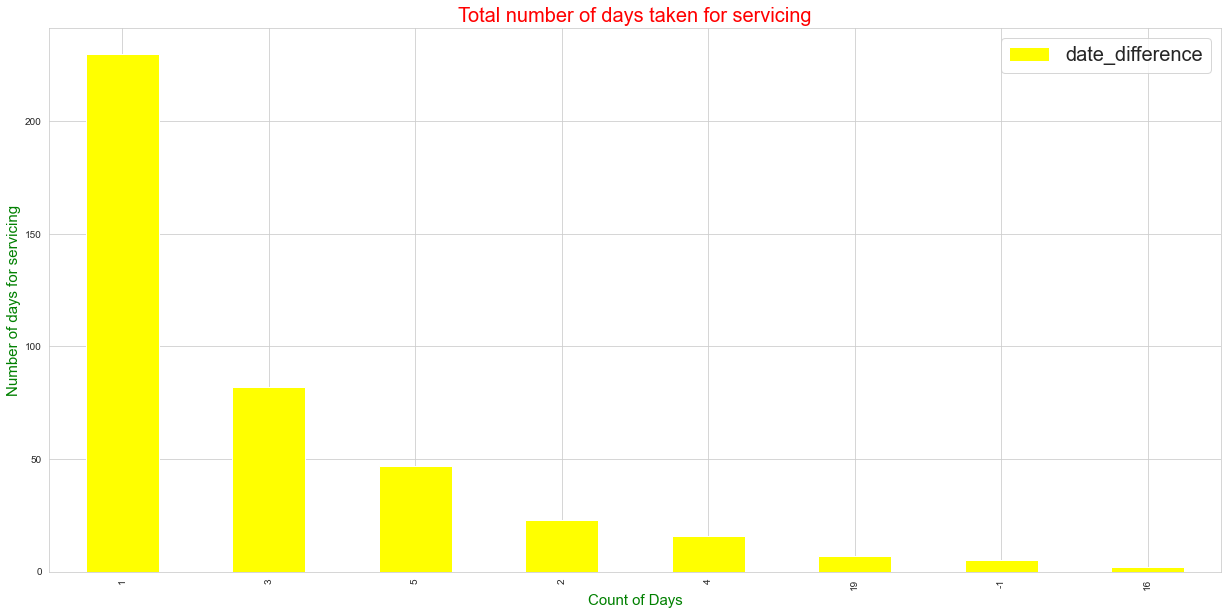

In [31]:
d2=data.date_difference.value_counts()[1:]
d2.plot(kind='bar',figsize=[21,10],color='yellow')
plt.xlabel("Count of Days",fontsize=15,color='green')
plt.ylabel("Number of days for servicing",fontsize=15,color='green')
plt.title("Total number of days taken for servicing",fontdict={'fontsize':20,'color':'red'})
plt.legend(loc='upper right',frameon=True, labelspacing=1,fontsize=20)

Text(0.5, 1.0, 'Most sold service parts')

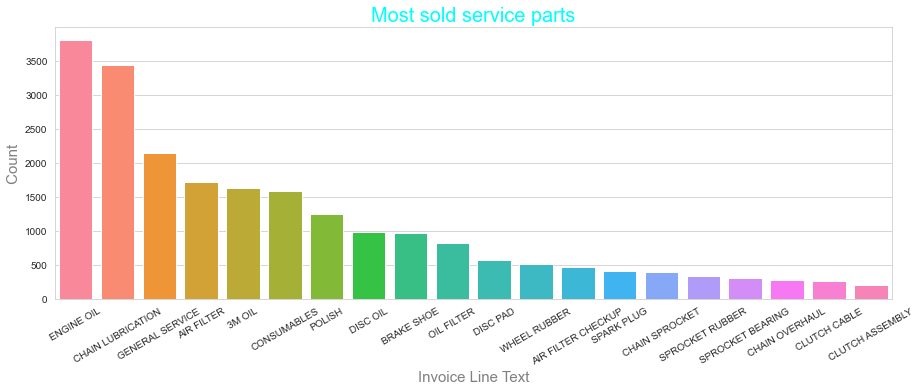

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(data['INVOICE_LINE_TEXT'],order=data['INVOICE_LINE_TEXT'].value_counts().index[:20],saturation=10)
plt.xticks(rotation=30)
plt.xlabel("Invoice Line Text",fontsize=15,color='grey')
plt.ylabel(" Count ",fontsize=15,color='grey')
plt.title("Most sold service parts",fontdict={'fontsize':20,'color':'cyan'})

Text(0.5, 1.0, 'Least sold service parts')

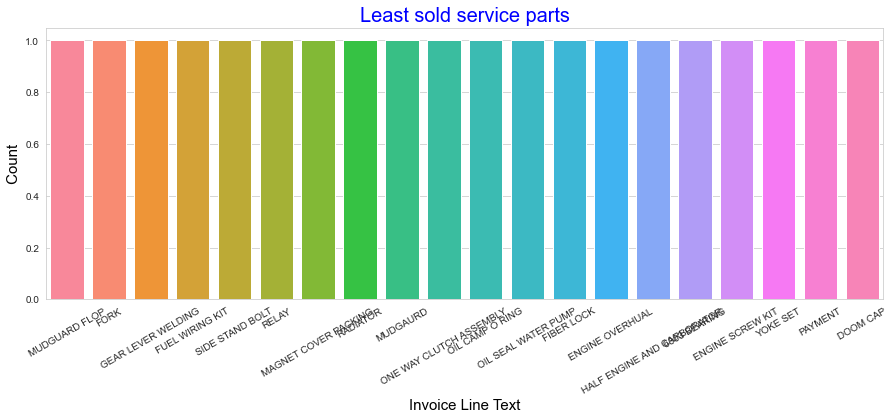

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(data['INVOICE_LINE_TEXT'],order=data['INVOICE_LINE_TEXT'].value_counts().index[-20:],saturation=10)
plt.xticks(rotation=30)
plt.xlabel("Invoice Line Text",fontsize=15,color='black')
plt.ylabel(" Count ",fontsize=15,color='black')
plt.title("Least sold service parts",fontdict={'fontsize':20,'color':'blue'})

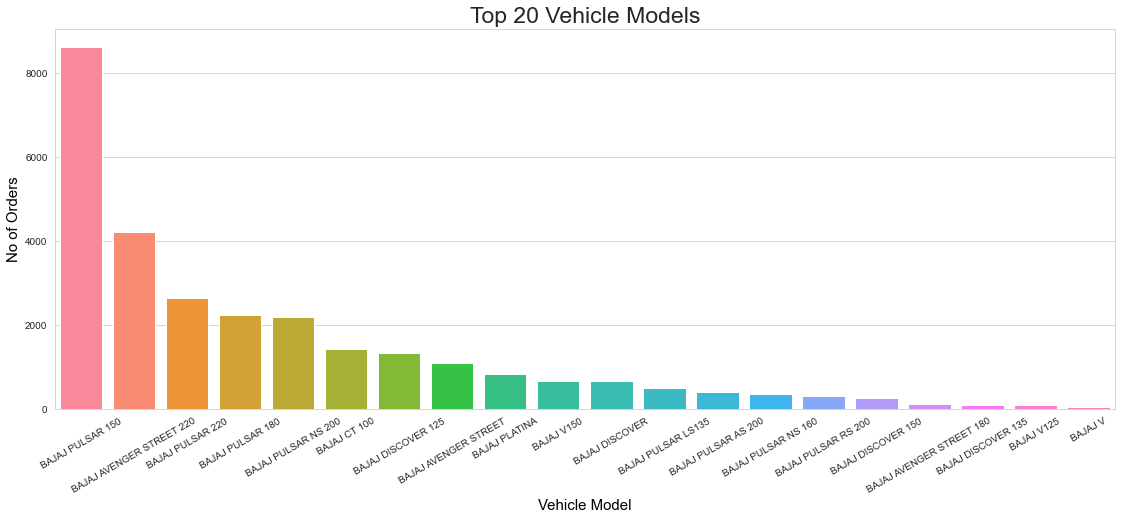

In [34]:
plt.figure(figsize=[19,7])
sns.countplot(data['Vehicle_Model'],order=data['Vehicle_Model'].value_counts().iloc[:20].index,saturation=10)
plt.xlabel("Vehicle Model",fontdict={'fontsize':15},color='black')
plt.ylabel('No of Orders',fontdict={'fontsize':15},color='black')
plt.xticks(rotation=30)
plt.title("Top 20 Vehicle Models",fontdict={'fontsize':23});

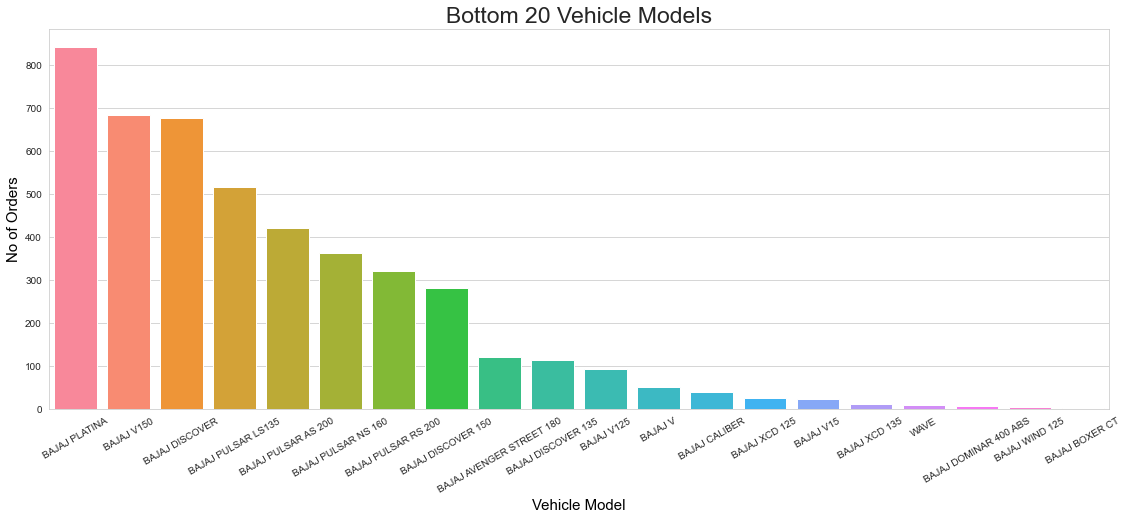

In [35]:
plt.figure(figsize=[19,7])
sns.countplot(data['Vehicle_Model'],order=data['Vehicle_Model'].value_counts().iloc[-20:].index,saturation=10)
plt.xlabel("Vehicle Model",fontdict={'fontsize':15},color='black')
plt.ylabel('No of Orders',fontdict={'fontsize':15},color='black')
plt.xticks(rotation=30)
plt.title("Bottom 20 Vehicle Models",fontdict={'fontsize':23});

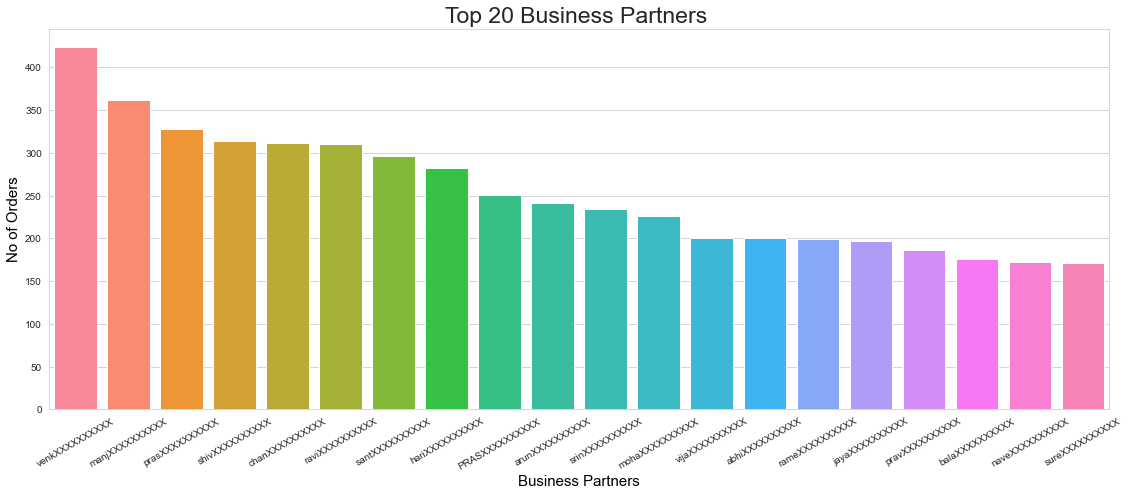

In [36]:
plt.figure(figsize=[19,7])
sns.countplot(data['Business_Partner_Name'],order=data['Business_Partner_Name'].value_counts().iloc[:20].index,saturation=10)
plt.xlabel("Business Partners",fontdict={'fontsize':15},color='black')
plt.ylabel('No of Orders',fontdict={'fontsize':15},color='black')
plt.xticks(rotation=30)
plt.title("Top 20 Business Partners ",fontdict={'fontsize':23});

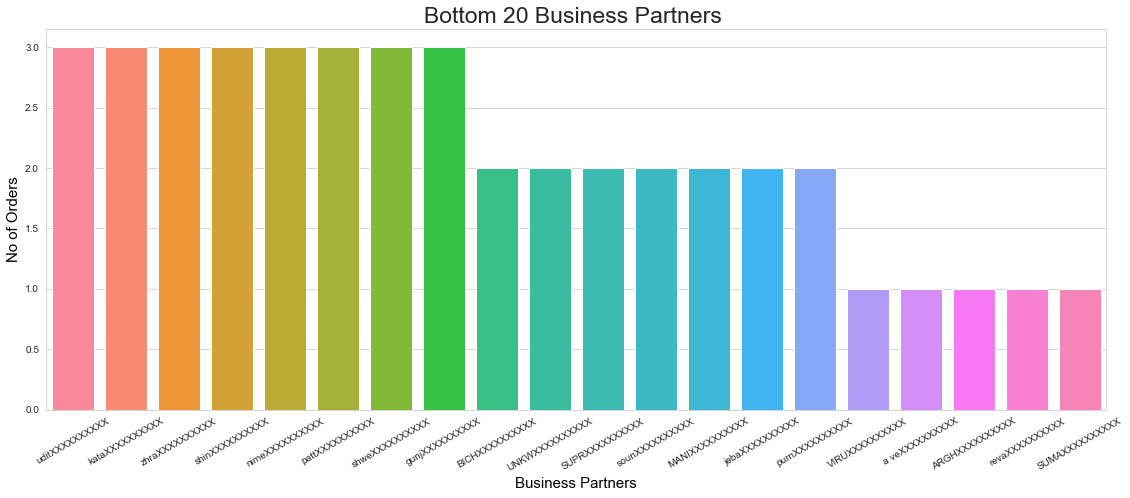

In [37]:
plt.figure(figsize=[19,7])
sns.countplot(data['Business_Partner_Name'],order=data['Business_Partner_Name'].value_counts().iloc[-20:].index,saturation=10)
plt.xlabel("Business Partners",fontdict={'fontsize':15},color='black')
plt.ylabel('No of Orders',fontdict={'fontsize':15},color='black')
plt.xticks(rotation=30)
plt.title("Bottom 20 Business Partners ",fontdict={'fontsize':23});

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28448 entries, 0 to 28481
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Invoice_Date           28448 non-null  datetime64[ns]
 1   Job_Card_Date          28448 non-null  datetime64[ns]
 2   Business_Partner_Name  28448 non-null  object        
 3   Vehicle_No             28448 non-null  object        
 4   Vehicle_Model          28448 non-null  object        
 5   Current_KM_Reading     28448 non-null  float64       
 6   INVOICE_LINE_TEXT      28448 non-null  object        
 7   Orders_on_Demand       28448 non-null  float64       
 8   date_difference        28448 non-null  int64         
 9   Year                   28448 non-null  int64         
 10  Month                  28448 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 3.9+ MB


# Creating a new Dataframe containing Invoice Line Text and Orders on Demand

In [39]:
data_new=data.groupby(data.Job_Card_Date).sum()

In [40]:
data_new.drop(['Current_KM_Reading','date_difference','Year','Month'],axis=1,inplace=True)

In [41]:
data_new

,Orders_on_Demand
Job_Card_Date,
2017-05-30,1.0
2017-05-31,40.0
2017-06-01,49.0
2017-06-02,16.0
2017-06-03,40.0
...,...
2019-01-02,86.0
2019-01-03,59.0
2019-01-04,90.0


In [42]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 553 entries, 2017-05-30 to 2019-01-06
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Orders_on_Demand  553 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [43]:
data_new.head()

,Orders_on_Demand
Job_Card_Date,
2017-05-30,1.0
2017-05-31,40.0
2017-06-01,49.0
2017-06-02,16.0
2017-06-03,40.0


In [44]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 553 entries, 2017-05-30 to 2019-01-06
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Orders_on_Demand  553 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


# Timeseries Forecasting

Text(0.5, 0, 'Job Card Date')

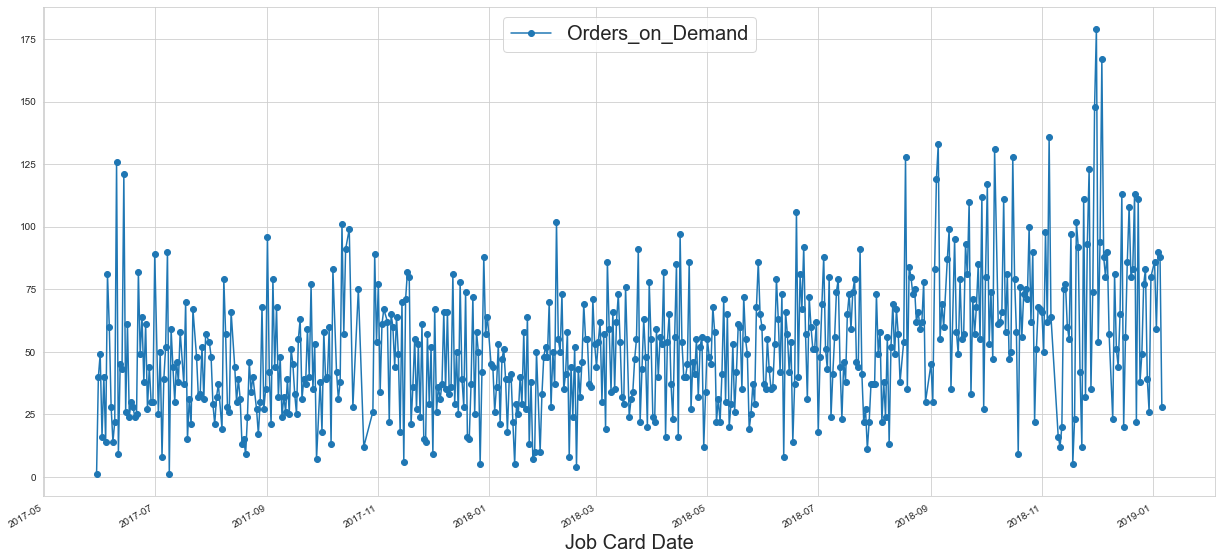

In [45]:
data_new.plot(figsize=(21,10),marker='o')
plt.legend(loc='upper center',frameon=True, labelspacing=1,fontsize=20)
plt.xlabel(xlabel='Job Card Date',fontdict={'fontsize':20})

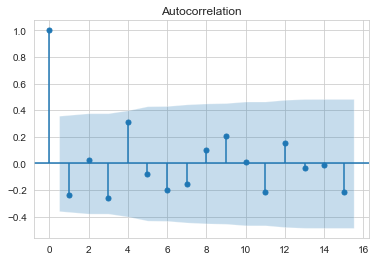

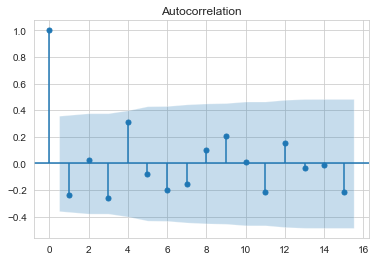

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_new.iloc[:30,:]) # inside iloc :30 means selecting Job Card Date values and : means selecting all the values from Orders on demand

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 15 must be < 15.

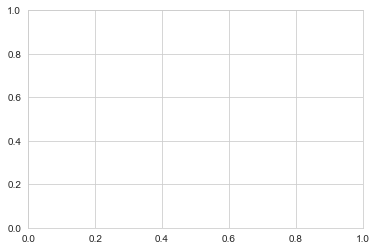

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_new.iloc[:30,:])

In [49]:
from pmdarima import auto_arima

In [51]:
auto_arima(data['Job_Card_Date'])

ARIMA(order=(0, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [52]:
auto_arima(data['Job_Card_Date'], error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                28448
Model:               SARIMAX(0, 2, 0)   Log Likelihood             -909876.763
Date:                Sun, 23 May 2021   AIC                        1819755.527
Time:                        19:07:12   BIC                        1819763.783
Sample:                             0   HQIC                       1819758.183
                              - 28448                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       3.55e+26    5.4e+23    656.923      0.000    3.54e+26    3.56e+26
===================================================================================
Ljung-Box (L1) (Q):                7080.75   Jarque-Bera (JB):           4080477.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        61.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [54]:
adf_test(data['Job_Card_Date'], title = 'Spare Parts')

Augmented Dickey-Fuller Test: Spare Parts
ADF test statistic         24.979302
p-value                     1.000000
# lags used                23.000000
# observations          28424.000000
critical value (1%)        -3.430580
critical value (5%)        -2.861642
critical value (10%)       -2.566824
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [55]:
stepwise_fit = auto_arima(data['Job_Card_Date'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1818323.596, Time=111.78 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1818339.149, Time=1.77 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1818321.880, Time=12.77 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1818321.880, Time=15.86 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1818319.587, Time=4.36 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1818321.879, Time=30.98 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1818323.562, Time=45.69 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1818321.911, Time=18.72 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1818321.589, Time=4.38 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1818319.749, Time=2.10 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1818323.629, Time=11.97 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=1818321.587, Time=6.07 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 266.536 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                28448
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood             -909157.794
Date:                            Sun, 23 May 2021   AIC                        1818319.587
Time:                                    19:14:40   BIC                        1818336.098
Sample:                                         0   HQIC                       1818324.899
                                          - 28448                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       5.778e-05      0.006      0.010      0.992      -0.011       0.011
sigma2       3.46e+26   2.81e-31   1.23e+57      0.000    3.46e+26    3.46e+26
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):           3033025.36
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        53.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.27e+73. Standard errors may be unstable.
"""

In [56]:
len(data)

28448

In [58]:
train = data.iloc[:25604]
test = data.iloc[25604:]

In [60]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
model = ARIMA(train['Job_Card_Date'],order=(1,1,0))
results = model.fit()
results.summary()

C:\Users\Haryaksh\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Haryaksh\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.Job_Card_Date   No. Observations:                25603
Model:                 ARIMA(1, 1, 0)   Log Likelihood             -810362.937
Method:                       css-mle   S.D. of innovations 13479007083891.004
Date:                Sun, 23 May 2021   AIC                        1620731.873
Time:                        19:19:34   BIC                        1620756.325
Sample:                             1   HQIC                       1620739.778
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.846e+12   8.28e+10     22.288      0.000    1.68e+12    2.01e+12
ar.L1.D.Job_Card_Date    -0.0171      0.006     -2.740      0.006      -0.029      -0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -58.3532           +0.0000j           58.3532            0.5000
-----------------------------------------------------------------------------
"""

In [63]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,0) Predictions')

C:\Users\Haryaksh\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<m8[ns]') and dtype('float64')

# Converting to Stationary

In [ ]:
data_diff=data_new.diff(periods=1)

In [ ]:
data_diff=data_diff[1:]
data_diff.head()

In [ ]:
plot_acf(data_diff.iloc[:30,:])

In [ ]:
plot_pacf(data_diff.iloc[:30,:])

In [ ]:
data_diff.plot(figsize=(21,10),marker='o')
sns.set_style("darkgrid")
plt.legend(loc='upper center',frameon=True, labelspacing=1,fontsize=20)
plt.xlabel(xlabel='Job Card Date',fontdict={'fontsize':20})

In [ ]:
data_diff.shape

In [ ]:
# print(X)

In [ ]:
# print(train)

In [ ]:
# print(test)

# AutoRegressive(AR) Model 

In [ ]:
X=data_diff.values
train=X[0:450]
test=X[451:]
predictions=[]

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar=AR(train)
model_ar_fit=model_ar.fit()
print(model_ar_fit.aic) #  Akaike Information Criteria 

In [ ]:
predictions=model_ar_fit.predict(start=50,end=150)
predictions

In [ ]:
plt.figure(figsize=(16,5))
sns.set_style("darkgrid")
plt.plot(test,color='blue',label='Actual data',marker='o')
plt.legend(loc='upper left',frameon=True,fontsize=15)
plt.title('Prediction using AR Model',fontdict={'fontsize':25},color='green')
plt.plot(predictions,color='red',label="Predicted data",marker='o')
plt.show()

In [ ]:
mean_squared_error(test,predictions)

In [ ]:
np.sqrt(mean_squared_error(test,predictions))

# Moving Average(MA) Model

In [ ]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
model_ma=ARMA(train,order=(0, 1))
model_ma_fit=model_ma.fit()
print(model_ma_fit.aic) #  Akaike Information Criteria 

In [ ]:
predictions=model_ar_fit.predict(start=50,end=150)
predictions

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(test,color='blue',label='Actual data',marker='o')
plt.plot(predictions,color='red',label="Predicted data",marker='o')
plt.legend(loc='upper left',frameon=True,fontsize=15)
plt.title('Prediction using MA Model',fontdict={'fontsize':25},color='green')
plt.show()

In [ ]:
mean_squared_error(test,predictions)

In [ ]:
np.sqrt(mean_squared_error(test,predictions))

# Auto Regressive Moving Average(ARMA) Model

In [ ]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
model_arma=ARMA(train,order=(1,1))
model_arma_fit=model_arma.fit()
print(model_arma_fit.aic) #  Akaike Information Criteria 

In [ ]:
predictions=model_arma_fit.predict(start=50,end=150)
predictions

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(test,color='blue',label='Actual data',marker='o')
plt.plot(predictions,color='red',label="Predicted data",marker='o')
plt.legend(loc='upper left',frameon=True,fontsize=15)
plt.title('Prediction using ARMA Model',fontdict={'fontsize':25},color='green')
plt.show()

In [ ]:
mean_squared_error(test,predictions)

In [ ]:
np.sqrt(mean_squared_error(test,predictions))

# Auto Regressive Integrated Moving Average (ARIMA) Model

In [ ]:
X=data_diff.values
train=X[0:450]
test=X[451:]
predictions=[]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# p - periods taken for autoregressive , d - integrated order of difference , q - periods in moving average
model_arima=ARIMA(train,order=(2,1,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic) #  Akaike Information Criteria 

In [ ]:
predictions=model_arima_fit.predict(start=50,end=150)
predictions

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(test,color='Blue',label='Actual Data',marker='o')
plt.plot(predictions, color='Red',label='Predicted Data',marker='o')
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=15)
plt.title('Prediction using ARIMA Model',fontdict={'fontsize':25},color='green')
plt.show()

In [ ]:
mean_squared_error(test,predictions)

In [ ]:
np.sqrt(mean_squared_error(test,predictions))

In [ ]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for a in pdq:
    try:
        model_arima=ARIMA(train,order=a)
        model_arima_fit=model_arima.fit()
        print(a,model_arima_fit.aic)
        print(model_fit.summary())

    except:
        continue

# Seasonal Autoregressive Integrated Moving Average (SARIMA) Model

In [ ]:
X=data_diff.values
train=X[0:450]
test=X[451:]
predictions=[]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
model_sarima = SARIMAX(test, order=(3,2,2), seasonal_order=(2,2,2,2))
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.aic)

In [ ]:
predictions=model_sarima_fit.predict(start=50,end=150)
predictions

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(test,color='Blue',label='Actual Data',marker='o')
plt.plot(predictions, color='Red',label='Predicted Data',marker='o')
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=15)
plt.title('Prediction using SARIMA Model',fontdict={'fontsize':25},color='green')
plt.show()

In [ ]:
mean_squared_error(test,predictions)

In [ ]:
np.sqrt(mean_squared_error(test,predictions))

In [ ]:
import itertools
p=d=q=s=range(0,2)
pdqs=list(itertools.product(p,d,q,s))
pdqs

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for a in pdqs:
    try:
        model_sarima=SARIMAX(train,order=a,seasonal_order=a)
        model_sarima_fit=model_sarima.fit()
        print(a,model_sarima_fit.aic)
        print(model_fit.summary())

    except:
        continue

# Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

In [ ]:
X=data_diff.values
train=X[0:400]
test=X[401:]
predictions=[]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [ ]:
model_sarimax = SARIMAX(train,exdog=test,order=(3,2,2), seasonal_order=(1,1,1,1))
model_sarimax_fit = model_sarimax.fit()
print(model_sarimax_fit.aic)

In [ ]:
predictions=model_sarimax_fit.predict(start=50,end=200)
predictions

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(test,color='Blue',label='Actual Data',marker='o')
plt.plot(predictions, color='Red',label='Predicted Data',marker='o')
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=15)
plt.title('Prediction using SARIMAX Model',fontdict={'fontsize':25},color='green')
plt.show()

In [ ]:
mean_squared_error(test,predictions)

In [ ]:
np.sqrt(mean_squared_error(test,predictions))

In [ ]:
import itertools
p=d=q=s=range(0,2)
pdqs=list(itertools.product(p,d,q,s))
pdqs

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for a in pdqs:
    try:
        model_sarimax=SARIMAX(train,order=a,seasonal_order=a)
        model_sarimax_fit=model_sarimax.fit()
        print(a,model_sarimax_fit.aic)
        print(model_fit.summary())

    except:
        continue